In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
from matplotlib import pyplot as plt
from bokeh.models import ColumnDataSource
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.layouts import layout
from bokeh.models import CategoricalColorMapper, Legend
import numpy as np
%matplotlib inline  

In [2]:
consumption = pd.read_csv('newfish-and-seafood-consumption-per-capita.csv')

In [3]:
production = pd.read_csv('seafood-and-fish-production-thousand-tonnes.csv')

In [4]:
c_entity = consumption[['Entity','Year','Fish, Seafood- Food supply quantity (kg/capita/yr) (FAO, 2020)','TotalC']]
p_entity = production[['Entity','Year','Total']]

In [5]:
c_SA = c_entity[c_entity["Entity"]=='South Africa']
c_C = c_entity[c_entity["Entity"]=='China']
c_N = c_entity[c_entity["Entity"]=='Norway']
p_SA = p_entity[p_entity["Entity"]=='South Africa']
p_C = p_entity[p_entity["Entity"]=='China']
p_N = p_entity[p_entity["Entity"]=='Norway']

In [6]:
c_SA = c_SA.set_index("Year")
c_C = c_C.set_index("Year")
c_N = c_N.set_index("Year")
p_SA = p_SA.set_index("Year")
p_C = p_C.set_index("Year")
p_N = p_N.set_index("Year")

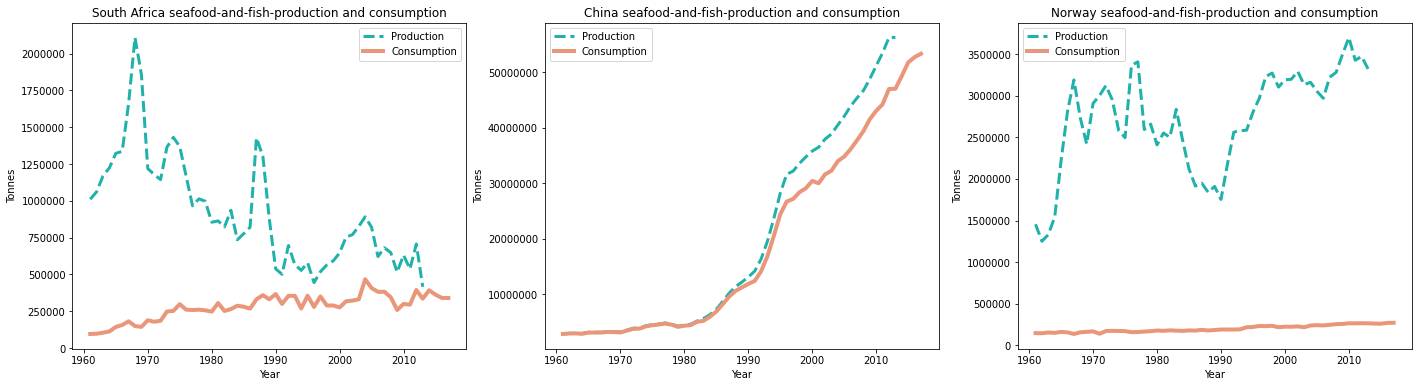

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))

axs[0].plot(p_SA['Total'],color='lightseagreen', linewidth=3,linestyle='dashed',label="Production")
axs[0].plot(c_SA['TotalC'],color='#E9967A', linewidth=4, label='Consumption')
axs[0].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[0].set_title('South Africa seafood-and-fish-production and consumption')
axs[0].set_ylabel('Tonnes')
axs[0].set_xlabel('Year')
axs[0].legend()

axs[1].plot(p_C['Total'],color='lightseagreen',linewidth=3,linestyle='dashed',label='Production')
axs[1].plot(c_C['TotalC'],color='#E9967A', linewidth=4, label='Consumption')
axs[1].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[1].set_title('China seafood-and-fish-production and consumption')
axs[1].set_ylabel('Tonnes')
axs[1].set_xlabel('Year')
axs[1].legend()

axs[2].plot(p_N['Total'],color='lightseagreen', linewidth=3,linestyle='dashed',label='Production')
axs[2].plot(c_N['TotalC'],color='#E9967A', linewidth=4, label='Consumption')
axs[2].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[2].set_title('Norway seafood-and-fish-production and consumption')
axs[2].set_ylabel('Tonnes')
axs[2].set_xlabel('Year')
axs[2].legend()

In [8]:
population = pd.read_csv('population_total.csv')

In [9]:
population = population.drop(columns=['Country Code'])
# pop_C = population[population['Country Name'] == 'China']
# pop_SA = population[population['Country Name'] == 'South Africa']
# pop_N = population[population['Country Name'] == 'Norway']
population = population.set_index('Country Name')
population = population.transpose()
pop_C = population['China']


Text(0.5, 0, 'Year')

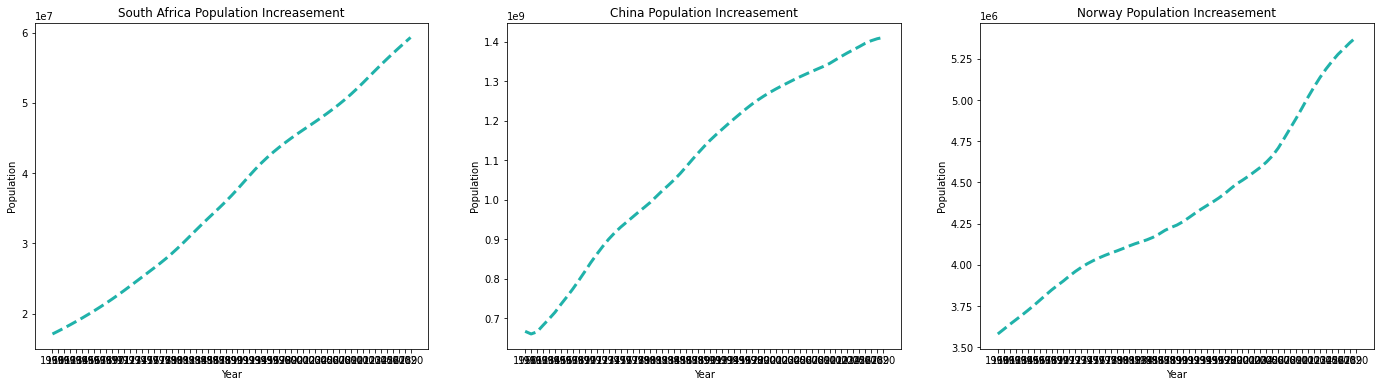

In [10]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))

axs[0].plot(population['South Africa'],color='lightseagreen', linewidth=3,linestyle='dashed')
# axs[0].ticklabel_format(style='plain')
axs[0].set_title('South Africa Population Increasement')
axs[0].set_ylabel('Population')
axs[0].set_xlabel('Year')


axs[1].plot(population['China'],color='lightseagreen',linewidth=3,linestyle='dashed')
# axs[1].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[1].set_title('China Population Increasement')
axs[1].set_ylabel('Population')
axs[1].set_xlabel('Year')

axs[2].plot(population['Norway'],color='lightseagreen',linewidth=3,linestyle='dashed')
# axs[2].ticklabel_format(style='plain', axis='both',useOffset=False)
axs[2].set_title('Norway Population Increasement')
axs[2].set_ylabel('Population')
axs[2].set_xlabel('Year')


In [11]:
i = pd.read_csv('FAOSTAT_import.csv')
e = pd.read_csv('FAOSTAT_export.csv')

In [12]:
i_SA =i[(i["Area"]=='South Africa')]
i_C = i[(i["Area"]=='China')]
i_N = i[(i["Area"]=='Norway')]
e_SA =e[(e["Area"]=='South Africa')]
e_C = e[(e["Area"]=='China')]
e_N = e[(e["Area"]=='Norway')]

i_SA = i_SA.set_index("Year")
i_C = i_C.set_index("Year")
i_N = i_N.set_index("Year")
e_SA = e_SA.set_index("Year")
e_C = e_C.set_index("Year")
e_N = e_N.set_index("Year")

In [13]:
i_SA

,Domain Code,Domain,Area Code (FAO),Area,Element Code,Element,Item Code,Item,Year Code,Unit,Value,Flag,Flag Description
Year,,,,,,,,,,,,,
2010,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2010,1000 tonnes,165.85,A,"Aggregate, may include official, semi-official..."
2011,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2011,1000 tonnes,158.73,A,"Aggregate, may include official, semi-official..."
2012,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2012,1000 tonnes,210.87,A,"Aggregate, may include official, semi-official..."
2013,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2013,1000 tonnes,217.14,A,"Aggregate, may include official, semi-official..."
2014,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2014,1000 tonnes,284.78,A,"Aggregate, may include official, semi-official..."
2015,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2015,1000 tonnes,234.02,A,"Aggregate, may include official, semi-official..."
2016,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2016,1000 tonnes,256.80,A,"Aggregate, may include official, semi-official..."
2017,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2017,1000 tonnes,283.03,A,"Aggregate, may include official, semi-official..."
2018,FBS,Food Balances (2010-),202,South Africa,5611,Import Quantity,2960,"Fish, Seafood",2018,1000 tonnes,283.03,A,"Aggregate, may include official, semi-official..."


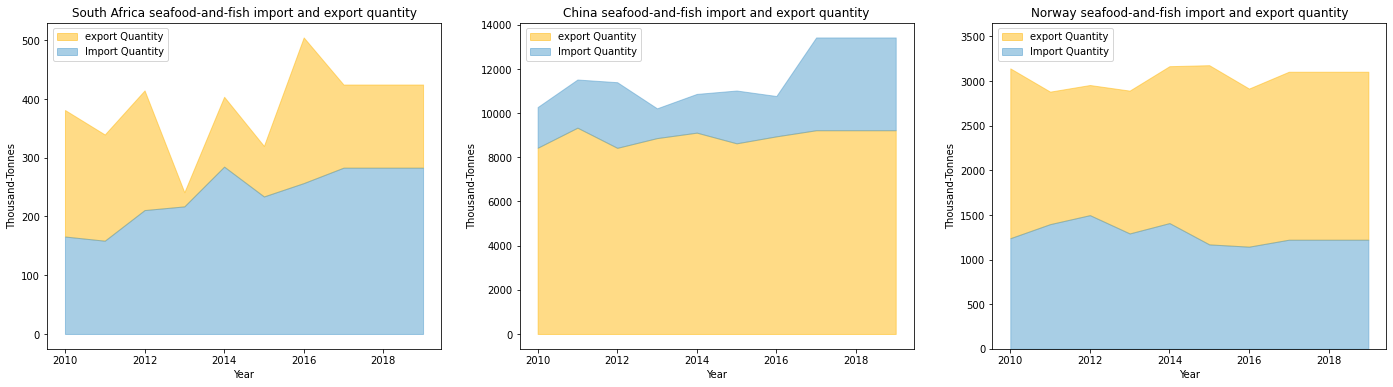

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(24,6))

x = i_SA.index

axs[0].fill_between(x,e_SA['Value'],i_SA['Value'],color='#FFB90F',alpha=0.5,label="export Quantity")
axs[0].fill_between(x,i_SA['Value'],0,color='#539ecd',alpha=0.5,label="Import Quantity")
axs[0].set_title('South Africa seafood-and-fish import and export quantity')
axs[0].set_ylabel('Thousand-Tonnes')
axs[0].set_xlabel('Year')
axs[0].legend(bbox_to_anchor=(0.32, 1))


axs[1].fill_between(x,e_C['Value'],0,color='#FFB90F',alpha=0.5,label="export Quantity")
axs[1].fill_between(x,i_C['Value'],e_C['Value'],color='#539ecd',alpha=0.5,label="Import Quantity")
axs[1].set_title('China seafood-and-fish import and export quantity')
axs[1].set_ylabel('Thousand-Tonnes')
axs[1].set_xlabel('Year')
axs[1].legend(bbox_to_anchor=(0.32, 1))

axs[2].fill_between(x,e_N['Value'],i_N['Value'],color='#FFB90F',alpha=0.5,label="export Quantity")
axs[2].fill_between(x,i_N['Value'],0,color='#539ecd',alpha=0.5,label="Import Quantity")
axs[2].set_ylim([0, 1.15*max(e_N['Value'])])
axs[2].set_title('Norway seafood-and-fish import and export quantity')
axs[2].set_ylabel('Thousand-Tonnes')
axs[2].set_xlabel('Year')
axs[2].legend(bbox_to_anchor=(0.32, 1))

In [15]:
pro = pd.read_csv('animal-protein-consumption.csv')

In [16]:
protein = pro[((pro["Entity"]=='China')|(pro["Entity"]=='Norway')|(pro["Entity"]=='South Africa'))]

In [17]:
protein = protein[protein["Year"]==2017]
protein = protein.drop(columns=['Code','Year'])
protein = protein.set_index('Entity')
countries = ['China','Norway','South Africa']

In [18]:
protein

,Poultry,Pork,Beef,Lamb & goat,Other meat,Eggs,Milk,"Fish, Seafood"
Entity,,,,,,,,
China,4.17,11.35,2.11,1.22,0.60,7.13,2.72,9.07
Norway,7.81,6.09,7.05,1.80,0.37,3.62,21.52,14.77
South Africa,14.11,1.12,6.64,1.00,0.34,2.07,4.94,1.62


In [19]:
protein_sum = []
protein_sum = protein.sum(axis=1)

In [20]:
protein_sum['Norway']

63.03

In [21]:
entities = ['Poultry','Pork','Beef','Lamb & goat','Other meat','Eggs','Milk','Fish, Seafood']
colors=['#53868B','#FFB90F','#C1FFC1','#CDAD00','#808080','#E9967A','#BF3EFF','#e84d60']

In [22]:
protein_cds = {}
protein_cds['countries'] = list(protein.index.values)
for food in list(protein.columns):
    protein_cds[food] = list((protein[food].values/protein_sum)*100)

In [23]:
tooltips = [
    ('Country', '@countries'),
    ('Source', '$name'),
    ('Percent', '@$name%')]

In [24]:
p = figure(y_range=countries, plot_width=900,plot_height=500, x_range=(1,101),
           title="Protein Supply Per Capita", toolbar_location=None,tools="save",tooltips=tooltips)

p.hbar_stack(entities, y='countries', height=0.9, color=colors, source=ColumnDataSource(protein_cds),
             legend_label=["%s" % x for x in entities])

p.y_range.range_padding = 0.1
p.ygrid.grid_line_color = None
p.legend.orientation = "horizontal"
p.legend.click_policy = "hide" 
p.axis.minor_tick_line_color = None
p.outline_line_color = None
p.xaxis.axis_label = '%'
p.yaxis.axis_label = 'Country'
new_legend = p.legend[0]
p.add_layout(new_legend, 'above')

output_notebook()
show(p)

Loading BokehJS ...